In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings


pd.set_option('display.max_columns', 200)
warnings.filterwarnings("ignore")

#
STATE GDP

In [380]:
gdp_state = pd.read_csv('Data/USGDP_1997_2020.csv')

gdp_state.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States *,,SAGDP2N,1.0,...,All industry total,Millions of current dollars,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,14451860.0,14712845.0,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0,20936558.0
1,"""00000""",United States *,,SAGDP2N,2.0,...,Private industries,Millions of current dollars,7431992.0,7871500.0,8378315.0,8929320.0,9188887.0,9462020.0,9905899.0,10582459.0,11326369.0,12022614.0,12564794.0,12731237.0,12403880.0,12884089.0,13405520.0,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0,18290860.0
2,"""00000""",United States *,,SAGDP2N,3.0,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,108637.0,99756.0,92590.0,98312.0,99836.0,95629.0,113953.0,142945.0,128347.0,125130.0,144062.0,147244.0,129968.0,146299.0,180945.0,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0,175802.0
3,"""00000""",United States *,,SAGDP2N,4.0,111-112,Farms,Millions of current dollars,88136.0,79030.0,70934.0,76043.0,78093.0,74033.0,91105.0,119356.0,104459.0,96264.0,115665.0,119476.0,103102.0,117629.0,152249.0,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0,(NA)
4,"""00000""",United States *,,SAGDP2N,5.0,113-115,"Forestry, fishing, and related activities",Millions of current dollars,20501.0,20726.0,21656.0,22269.0,21743.0,21596.0,22848.0,23589.0,23888.0,28866.0,28397.0,27768.0,26866.0,28670.0,28696.0,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0,(NA)


In [381]:
# gdp_state = gdp_state[gdp_state.GeoName != 'United States *']
gdp_state = gdp_state.loc[gdp_state['Description'] == 'All industry total']
gdp_state = gdp_state.drop(['IndustryClassification', 'Description', 'LineCode', 'TableName'], axis=1).reset_index(drop=True)
gdp_state = gdp_state.iloc[:-8, :]

In [382]:
for year in range(1997, 2021):
    gdp_state[str(year)] = pd.to_numeric(gdp_state[str(year)])

In [383]:
gdp_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GeoFIPS  52 non-null     object 
 1   GeoName  52 non-null     object 
 2   Region   52 non-null     object 
 3   Unit     52 non-null     object 
 4   1997     52 non-null     float64
 5   1998     52 non-null     float64
 6   1999     52 non-null     float64
 7   2000     52 non-null     float64
 8   2001     52 non-null     float64
 9   2002     52 non-null     float64
 10  2003     52 non-null     float64
 11  2004     52 non-null     float64
 12  2005     52 non-null     float64
 13  2006     52 non-null     float64
 14  2007     52 non-null     float64
 15  2008     52 non-null     float64
 16  2009     52 non-null     float64
 17  2010     52 non-null     float64
 18  2011     52 non-null     float64
 19  2012     52 non-null     float64
 20  2013     52 non-null     float64
 21  2014     52 non-nu

In [384]:
gdp_state.isna().sum()

GeoFIPS    0
GeoName    0
Region     0
Unit       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [385]:
gdp_state

,GeoFIPS,GeoName,Region,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States *,,Millions of current dollars,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,14451860.0,14712845.0,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0,20936558.0
1,"""01000""",Alabama,5,Millions of current dollars,104716.9,110181.3,115833.1,120132.9,123035.3,128117.4,133969.3,146886.7,156403.3,164347.8,170263.9,172677.2,169128.5,175470.1,181929.9,186553.9,192166.5,195037.7,200197.5,204454.7,210895.7,221030.7,228142.6,224870.6
2,"""02000""",Alaska,8,Millions of current dollars,25800.0,24227.6,24779.3,26815.8,28455.4,29633.4,31789.7,34987.9,39788.7,44457.1,49002.6,54759.0,49651.6,52947.7,56333.9,57717.5,56625.3,55750.6,50728.1,49755.6,51737.0,54292.9,54385.6,50246.7
3,"""04000""",Arizona,6,Millions of current dollars,132290.9,143286.2,155282.6,164609.9,171480.5,179475.6,192764.8,205390.5,228232.6,248154.2,262245.3,259262.6,243764.6,248125.3,257881.1,268068.2,275007.5,284851.4,298615.0,313056.5,330146.6,350718.3,370119.1,372461.0
4,"""05000""",Arkansas,5,Millions of current dollars,59826.9,62397.8,66791.2,68740.4,70680.3,73986.5,78306.3,84557.0,89643.1,94451.6,96991.9,99014.4,96983.7,100970.8,105107.8,107718.8,112764.6,116151.8,117734.3,119191.8,122978.5,127761.3,130954.1,129073.9
5,"""06000""",California,8,Millions of current dollars,1071327.2,1147944.3,1247734.4,1366166.5,1387551.8,1439341.7,1530559.8,1632428.7,1752648.9,1874851.3,1955320.9,1990187.9,1919271.1,1973511.9,2049336.8,2144089.6,2261510.6,2399077.7,2559643.2,2671100.5,2831038.4,2975083.0,3132800.6,3091871.5
6,"""08000""",Colorado,7,Millions of current dollars,136916.6,150364.4,164132.0,180693.3,187546.2,191062.2,196768.6,204374.6,220307.4,231256.3,246151.0,255830.2,248669.1,255660.7,264310.2,273593.9,288383.5,305690.9,317992.4,327757.3,348175.5,372452.9,392986.0,390098.7
7,"""09000""",Connecticut,1,Millions of current dollars,138548.4,145432.7,152353.9,165822.4,172834.5,176191.6,181230.3,198282.4,208660.9,222914.3,237397.6,240576.2,236921.6,238051.6,236816.3,244114.4,244127.5,248778.9,262372.7,266747.3,272569.9,279782.3,287822.2,280900.3
8,"""10000""",Delaware,2,Millions of current dollars,33400.0,37065.1,40427.3,43515.9,46555.9,45828.2,47731.3,51337.7,52028.2,54956.7,56281.3,54777.6,57267.3,57986.7,60821.8,61866.7,61007.5,67549.8,71547.8,69284.2,69899.4,74186.7,77082.4,75512.5
9,"""11000""",District of Columbia,2,Millions of current dollars,52483.3,54780.2,58751.3,61033.2,65518.4,70072.6,74178.3,80557.4,85349.2,88580.5,94036.8,99532.3,100916.9,106097.8,109998.8,112610.0,115021.1,119722.8,124853.7,129477.1,132853.6,138773.5,143389.3,143532.7


##
AirlineFlight DF

In [392]:
airline_flights = pd.read_csv('Data/US Airline Flight Routes and Fares 1993-2024 2.csv')

In [393]:
airline_flights.shape

(245955, 23)

In [394]:
airline_flights.sort_values(by=['Year', 'quarter'], ascending=[True, True], inplace=True)

In [395]:
airline_flights.rename(columns={
    'quarter': 'Quarter',
    'city1': 'Origin_City_Name',
    'city2': 'Destination_City_Name',
    'airportid_1': 'Origin_Airport_ID',
    'airportid_2': 'Destination_Airport_ID',
    'airport_1': 'Origin_Airport_Code',
    'airport_2': 'Destination_Airport_Code',
    'nsmiles': 'Distance_Between_Airports',
    'passengers': 'Num_Passengers',
    'fare': 'Average_Fare',
}, inplace=True)

In [396]:
airline_flights = airline_flights[[
                  #  'tbl', 
                  'Year', 'Quarter', 
                  #   'citymarketid_1', 'citymarketid_2',
                  'Origin_City_Name', 'Destination_City_Name', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
                  'Destination_Airport_Code', 'Distance_Between_Airports', 'Num_Passengers', 'Average_Fare',
                  #   'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low',
                  'Geocoded_City1', 'Geocoded_City2', 
                  #   'tbl1apk'
                    ]].copy()

In [397]:
airline_flights = airline_flights[~airline_flights['Year'].between(1993, 1996)]


In [398]:
airline_flights.head()

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2
5948,1997,1,"Houston, TX","Lubbock, TX",11495,12896,EFD,LBB,482,0,63.00,"Houston, TX\n(29.760803, -95.369506)","Lubbock, TX\n(41.181125, -96.030508)"
6177,1997,1,"Houston, TX","Mission/McAllen/Edinburg, TX",12191,13256,HOU,MFE,316,2,84.20,"Houston, TX\n(29.760803, -95.369506)","Mission/McAllen/Edinburg, TX\n(43.153621, -93...."
6275,1997,1,"Kansas City, MO","Miami, FL (Metropolitan Area)",13198,11697,MCI,FLL,1252,200,140.77,"Kansas City, MO\n(39.099792, -94.578559)","Miami, FL (Metropolitan Area)\n(44.977479, -93..."
6293,1997,1,"Los Angeles, CA (Metropolitan Area)","Medford, OR",10800,13264,BUR,MFR,659,24,132.86,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Medford, OR\n(42.064492, -87.93678)"
6360,1997,1,"Houston, TX","New York City, NY (Metropolitan Area)",12266,12478,IAH,JFK,1465,8,335.01,"Houston, TX\n(29.760803, -95.369506)","New York City, NY (Metropolitan Area)\n(40.123..."


In [404]:
airline_flights['Origin_City_Name'] = airline_flights['Origin_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
airline_flights['Destination_City_Name'] = airline_flights['Destination_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)

In [405]:
airline_flights.isna().sum()

Year                             0
Quarter                          0
Origin_City_Name                 0
Destination_City_Name            0
Origin_Airport_ID                0
Destination_Airport_ID           0
Origin_Airport_Code              0
Destination_Airport_Code         0
Distance_Between_Airports        0
Num_Passengers                   0
Average_Fare                     0
Geocoded_City1               39206
Geocoded_City2               39206
dtype: int64

In [406]:
airline_flights_cleaned = airline_flights.dropna()
airline_flights_cleaned.shape

(185475, 13)

In [411]:
airline_flights_cleaned

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2
5948,1997,1,"Houston, TX","Lubbock, TX",11495,12896,EFD,LBB,482,0,63.00,"Houston, TX\n(29.760803, -95.369506)","Lubbock, TX\n(41.181125, -96.030508)"
6177,1997,1,"Houston, TX","Mission/McAllen/Edinburg, TX",12191,13256,HOU,MFE,316,2,84.20,"Houston, TX\n(29.760803, -95.369506)","Mission/McAllen/Edinburg, TX\n(43.153621, -93...."
6275,1997,1,"Kansas City, MO","Miami, FL",13198,11697,MCI,FLL,1252,200,140.77,"Kansas City, MO\n(39.099792, -94.578559)","Miami, FL (Metropolitan Area)\n(44.977479, -93..."
6293,1997,1,"Los Angeles, CA","Medford, OR",10800,13264,BUR,MFR,659,24,132.86,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Medford, OR\n(42.064492, -87.93678)"
6360,1997,1,"Houston, TX","New York City, NY",12266,12478,IAH,JFK,1465,8,335.01,"Houston, TX\n(29.760803, -95.369506)","New York City, NY (Metropolitan Area)\n(40.123..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222938,2020,2,"Knoxville, TN","Tampa, FL",15412,15304,TYS,TPA,550,8,210.13,"(35.962631, -83.916677)","(37.8606, -78.804199)"
222939,2020,2,"Fayetteville, AR","Los Angeles, CA",15919,10800,XNA,BUR,1371,0,252.00,"(36.061928, -94.160583)","(34.052238, -118.243344)"
222940,2020,2,"Fayetteville, AR","Los Angeles, CA",15919,12892,XNA,LAX,1371,18,203.58,"(36.061928, -94.160583)","(34.052238, -118.243344)"
222941,2020,2,"Fayetteville, AR","Los Angeles, CA",15919,13891,XNA,ONT,1371,7,191.61,"(36.061928, -94.160583)","(34.052238, -118.243344)"


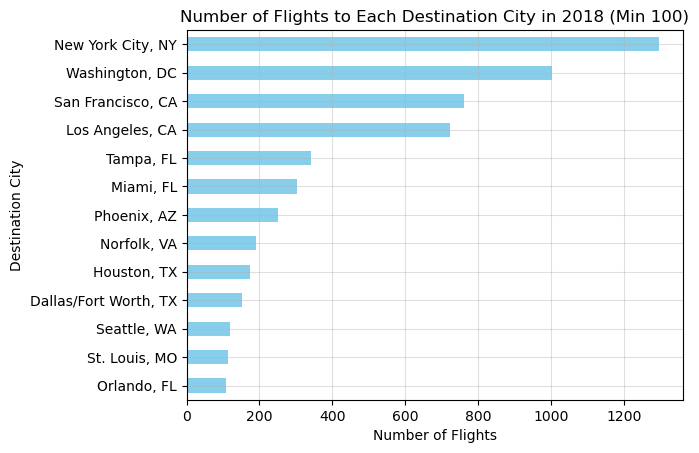

In [408]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

destination_counts = flights_2018['Destination_City_Name'].value_counts()
destination_counts_filtered = destination_counts[destination_counts > 100].sort_values(ascending=True)


destination_counts_filtered.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Flights')
plt.ylabel('Destination City')
plt.title('Number of Flights to Each Destination City in 2018 (Min 100)')
plt.grid(True, alpha= 0.4)


plt.show()

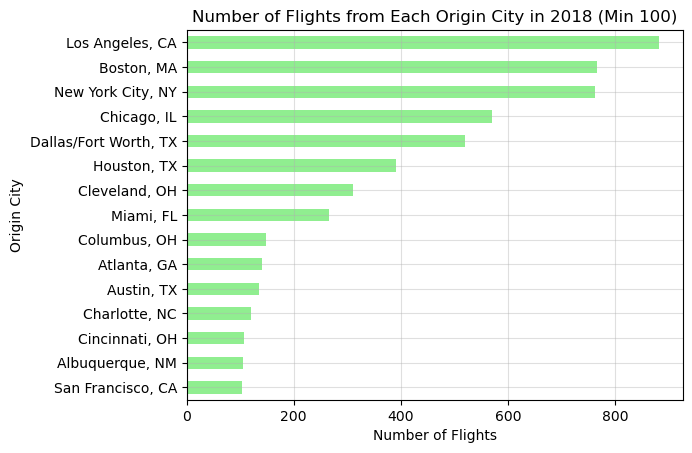

In [409]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

origin_counts = flights_2018['Origin_City_Name'].value_counts()
origin_counts_filtered = origin_counts[origin_counts > 100].sort_values(ascending=True)


origin_counts_filtered.plot(kind='barh', color='lightgreen')

plt.xlabel('Number of Flights')
plt.ylabel('Origin City')
plt.title('Number of Flights from Each Origin City in 2018 (Min 100)')
plt.grid(True, alpha= 0.4)


plt.show()

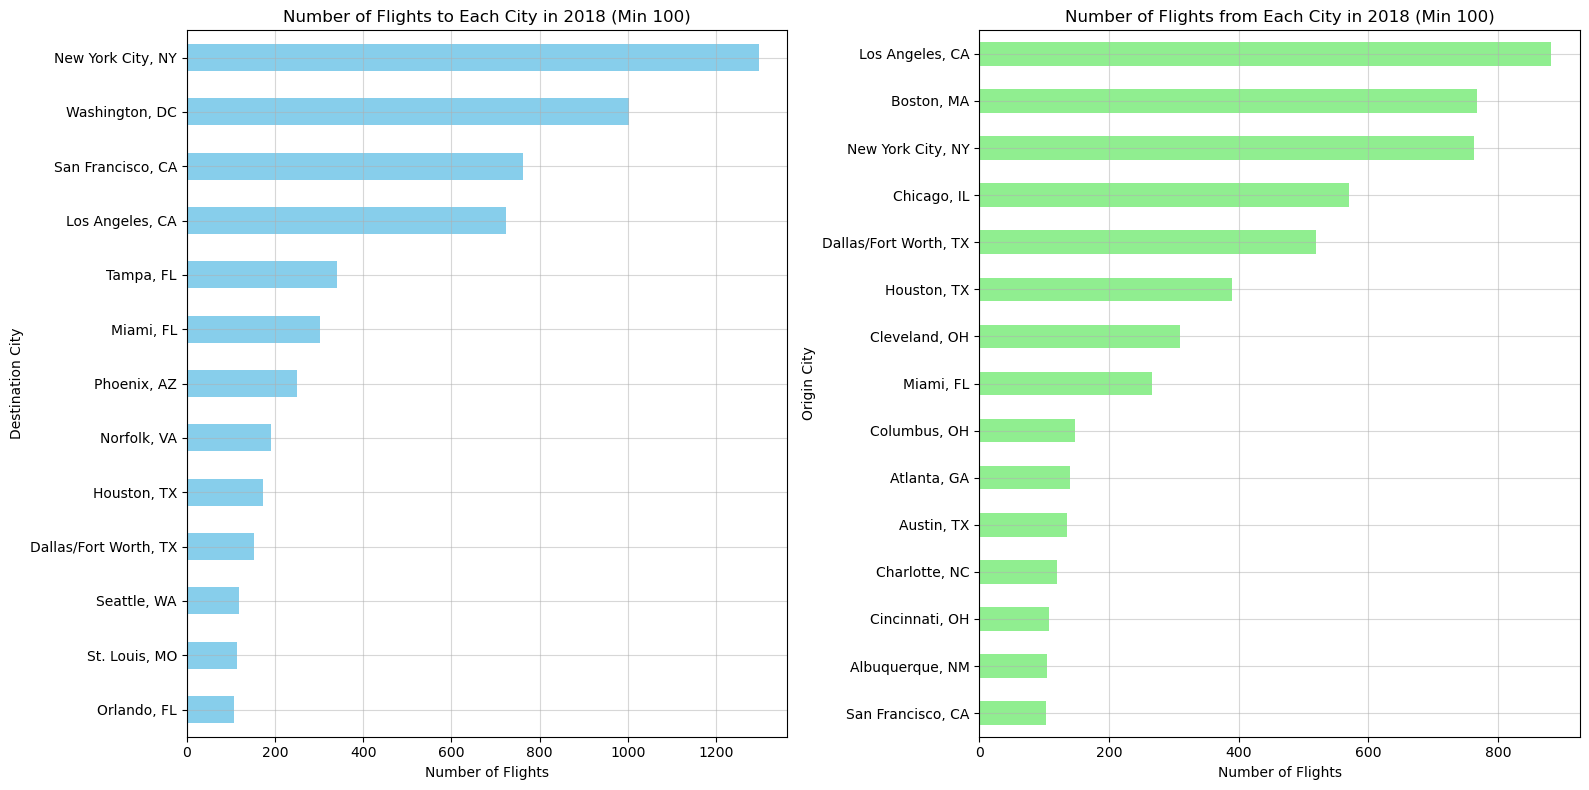

In [410]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
destination_counts_filtered.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Flights')
axes[0].set_ylabel('Destination City')
axes[0].set_title('Number of Flights to Each City in 2018 (Min 100)')
axes[0].grid(True, alpha=0.5)


origin_counts_filtered.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Flights')
axes[1].set_ylabel('Origin City')
axes[1].set_title('Number of Flights from Each City in 2018 (Min 100)')
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()